<a href="https://colab.research.google.com/github/zakstucke/geo-sentiment-analysis/blob/master/Racing_Bar_Data_Prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prepare data for bar graph using
https://flourish.studio/

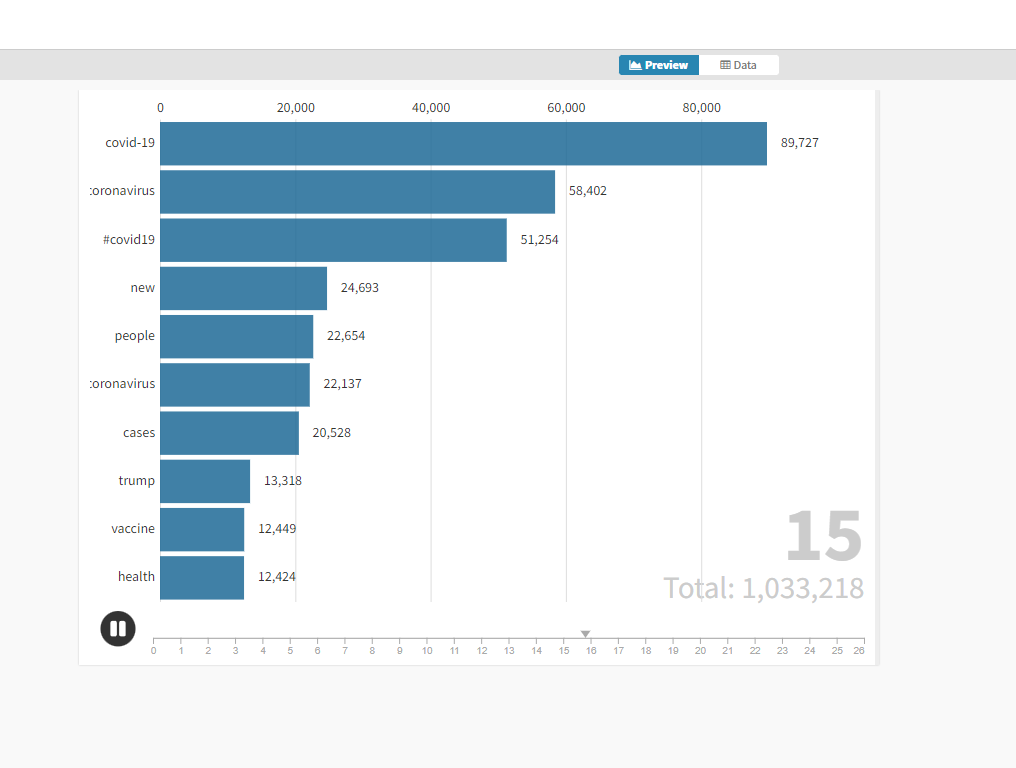

In [ ]:
#
# Functions taken from the github
# Adaptations made
#

def getPopularWords(df, overall):#Input a list of strings and amount of popular words needed, returns a list of popular words
      
    # # Remove filler words (can only currently do with english):
    # if row["lang"] == "en":
    #     row["cleaned_words"] = stripFillerWords(words)
    # else:
    #     row["cleaned_words"] = words
    # return row
  
  inOne = ""

  # for message in df.text:
  #   doc = nlp(message)
  #   # print(doc._.language['language'])
  #   if (doc._.language['language'] == 'en'):
  #     #message = message.translate(str.maketrans("", "", string.punctuation))
  #     inOne += message.lower() + " "


  df = df.reset_index()  # make sure indexes pair with number of rows
  for index, row in df.iterrows():
      if row["lang"] == "en":
        inOne += row["text"].lower() + " "

  justWords = inOne.split()#Splitting into words
  justWords = stripFillerWords(justWords) #ADDED
  popularWords = Counter(justWords)
  popularOverall = overall + popularWords
  return popularOverall #Looked into source code of counter and appears to be O(n) time complexity

def groupDFByMonth(df):
    df = df[df["created_at"].notna()]
    dates = pd.to_datetime(df['created_at'])
    df['created_at'] = dates
    df = df.set_index('created_at')
    return df.groupby(pd.Grouper(freq='M'))



def stripFillerWords(
    words,
):  # Takes a list of words as input and returns list with filler/stop words removed
    # Remove normal filler words (so, was etc):
    result = [word for word in words if word not in stop_words]

    # print("English word: " + next(iter(englishWords)))
    # print(word + " is English? " + nlp.vocab.strings[word])

    return result


def splitByMonth(df):
    df = df[df["created_at"].notna()]
    dates = pd.to_datetime(df['created_at'])
    df['created_at'] = dates
    df = df.set_index('created_at')
    strText = []
    for group_name, df_group in df.groupby(pd.Grouper(freq='M')):
        strText.append(df_group)
    return strText

In [ ]:
# Split words by month into seperate data frames
dfs = splitByMonth(COVIDdf)

In [ ]:
# Make cumulative table of most popular words
table = []
overall = Counter("")

for i,df in enumerate(dfs):
  overall = getPopularWords(df, overall)
  popWords = overall.most_common()
  row = {'month':i}
  for (word, count) in popWords: 
    row.update({word:count})
  table.append(row)

In [ ]:
# Make df
Outdf = pd.DataFrame(table)
Outdf = Outdf.reset_index(level=0)
Outdf.rename(columns={"level_0": "Month"})
Outdf = Outdf.transpose()

In [ ]:
# Sort, trim, and output df
Outdf = Outdf.sort_values(26, ascending = False)

# remove stuff not removed from filters
remove = ["-", "&amp;"]
Outdf = Outdf.drop(labels=remove, axis=0)

In [ ]:

# Take top 200 rows
Outdf = Outdf.iloc[0:200]

# DF -> csv
Outdf.to_csv('racingDF.csv')

# save csv locally
from google.colab import files
files.download("racingDF.csv")